<font color = green >

# Text classification: topic modeling 

</font>

<font color = green >

## Latent Dirichlet allocation (LDA)

</font>

Typically used to detect underlying topics in the text documents

**Input** : text documents and number of topics 
<br>
**Output**: Distribution of topics for each document (that allows to assign the one with highest probability) and word distribution for each topic 

**Assumptions**:
- Documents with similar topics use similar groups of words 
- Documents are probability distribution over latent topics 
- Topics are probability distribution over words


<font color = green >

### Generative process

</font>

LDA considers the every document is created the following way:

1) Define number of words in the document
<br>
2) Chose the topic mixture over the fixed set of topics (e.g. 20% of topic 'Financial', 30% of topic 'Computer Science', and 50% of topic 'Sport')
<br>
3) Generate the words by:
<br>
   -pick the topic based on document's multinomial distribution 
<br>
   -pick the word based on topic's multinomial distribution 

<img src = "topics_modeling2.jpg" height=500 width= 800 align="left">



<font color = green >

#### Recall
</font>


#### Binomial distribution

$$p(k/n)\quad =\quad C^{ k }_{ n }\cdot p^{ k }(1-p)^{ n-k }\quad =\quad \frac { n! }{ k!(n-k)! } p^{ k }(1-p)^{ n-k }$$

Example: Probability of 6 of 10 for fear coin: 
$$p(6,4)\quad =\quad C^{ 6 }_{ 10 }\cdot {0.5}^{ 6 }(0.5)^{ 4 }\quad = 210 \cdot 0.015625 \cdot 0.0625 = 0.205078125$$


#### Multinomial distribution

$$p(n_{ 1 }n_{ 2 }...n_{ k })\quad =\quad \frac { n! }{ n_{ 1 }!n_{ 2 }!...n_{ k }! } p^{ n_{ 1 } }_{ 1 }p^{ n_{ 2 } }_{ 2 }...p^{ n_{ k } }_{ k }$$

Example (three outcomes): <br>
n = 12 (12 games are played),<br>
n1 = 7 (number won by Player A),<br>
n2 = 2 (number won by Player B),<br>
n3 = 3 (the number drawn),<br>
p1 = 0.4 (probability Player A wins)<br>
p2 = 0.35(probability Player B wins)<br>
p3 = 0.25(probability of a draw)<br>
$$p(7,2,3)\quad =\quad \frac {12!}{ 7! \cdot 2! \cdot3 ! }  \cdot 0.4^{7} \cdot 0.35^{2} \cdot0.25^{3} = 0.0248$$




<font color = green >

### Maximul Likelihood Estimation
    
#### Simple sample
    
</font>

Data is factully sampled `Head Tail Head` (101)

Let's investigate  parametr `p` the probability of flipping `Head`

<!-- <img src = "MLE.jpg" height=500 width= 500 align="left"> -->


<br>

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


Text(0.68, 0.156, 'MLE')

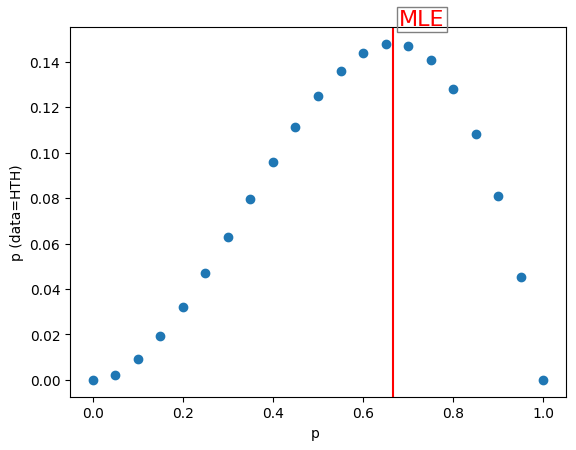

In [3]:
import numpy as np
import matplotlib.pyplot  as plt 
p = np.linspace(0,1,21) 
print (p )
data_prob = p**2 * (1-p) 
plt.scatter (p,  data_prob) 
plt.xlabel('p ')
plt.ylabel('p (data=HTH)')
plt.axvline(x=2/3, color='r')
plt.text(.68, .156 ,'MLE', fontsize= 16, color = 'r', bbox=dict(facecolor='none', edgecolor='gray', pad=2.0))

Now we have documents (instead of coin flips) and need to find the distributions (instead of `p` for coin sample) s.t. is MLE for data (all documents)

**Recall** 
<br> Known are text documents and number $K$ of topics 

**Target**:
<br>Within all possible topics distribution for all documemnts and all possible words distribution for topics, shoose the one wich maximizes probability of all text documents.

**Note:** It is unclear how to iterate over all possible distributions 

**Approach** :
<br>
1) Randomly assign each word of each document to $K$ topics 
<br>
2) Iterate the following process till convergence (steady assignments of w to topics) 
<br>$\quad$For each document $d$: 
<br>
    $\quad\quad\bullet$ Assume that all topic assignment except current one are correct<br>
    $\quad\quad\bullet$ For each word $w$ in $d$: <br>          
    $\quad\quad\quad\quad$  For every topic $t$ compare the the score for hypothesis that w is in this topic $t$:
   <br>$\quad\quad\quad\quad\quad score (t) =  p(t | d) \cdot p (w |t),$
   here $p(t|d)$ is proportion of all words in d from t,
    and $p(w|t)$ is share of word w in topic t.  
    <br>$\quad\quad\quad\quad$ Assign the word w to the topic with max score
    <br>$\quad\quad\bullet$ Iterate through all $w$ in $d$:           
<br>$\quad$Iterate through all $d$

The results is matrix of distribution of words in topics  

Note: 
- The computed topics are just words distribution, i.e. need to summarize them somehow 
- Topics distribution over documents are computed being based on words in document and corresponding topics of each word 

In [4]:
%pip install gensim 

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.0 MB 3.6 MB/s eta 0:00:07
    --------------------------------------- 0.4/24.0 MB 3.7 MB/s eta 0:00:07
   - -------------------------------------- 0.8/24.0 MB 5.4 MB/s eta 0:00:05
   - -------------------------------------- 1.0/24.0 MB 6.6 MB/s eta 0:00:04
   - -------------------------------------- 1.0/24.0 MB 6.6 MB/s eta 0:00:04
   - -------------------------------------- 1.0/24.0 MB 6.6 MB/s eta 0:00:04
   - -------------------------------------- 1.0/24.0 MB 6.6 MB/s eta 0:00:04
   - -------------------------------------- 1.0/24.0 MB 6.6 MB/s eta 0:00:04
   -- ------------------------------------- 1.2/24.0 MB 3.0 MB/s eta 0:00:08
   -- ------------------------------------- 1.5/24.0 MB 3.5 MB/s eta 0:00:07
   -- ------------------------------------- 1.6/24.0 MB 3.1 MB/s eta 0:00:08
   ---- ----------------------------------- 2.8/24.0 MB 5.0 MB/s eta 0:00:05
   ---

DEPRECATION: Loading egg at c:\users\acer\appdata\local\programs\python\python311\lib\site-packages\visual-0.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<font color = green >

## Gensim LDA 

</font>



In [5]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.corpus import stopwords

<font color = green >

### Define the text documents 

</font>



In [6]:
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]


<font color = green >

### Tokenize, clean, and stem

</font>



In [7]:
en_stop  = set(stopwords.words('english'))
p_stemmer = PorterStemmer()

def tokenize(doc_set):
    texts = []
    for doc in doc_set:
        # tokenize document string
        raw = doc.lower()
        tokens = word_tokenize(raw)

        # remove stop words from tokens
        tokens = [token for token in tokens if token not in en_stop]

        # stem tokens
        tokens = [p_stemmer.stem(token) for token in tokens]

        # add tokens to list
        texts.append(tokens)
    return texts

texts = tokenize(doc_set)
texts[0]

['brocolli',
 'good',
 'eat',
 '.',
 'brother',
 'like',
 'eat',
 'good',
 'brocolli',
 ',',
 'mother',
 '.']

<font color = green >

### Convert tokenized documents into a "id <-> term" dictionary

</font>



In [8]:
dictionary = corpora.Dictionary(texts) # this is alternative way - without using count vectorizer
print (type(dictionary), dictionary)
for k,w in dictionary.items():
    print (k,w)

<class 'gensim.corpora.dictionary.Dictionary'> Dictionary<34 unique tokens: [',', '.', 'brocolli', 'brother', 'eat']...>
0 ,
1 .
2 brocolli
3 brother
4 eat
5 good
6 like
7 mother
8 around
9 basebal
10 drive
11 lot
12 practic
13 spend
14 time
15 blood
16 caus
17 expert
18 health
19 increas
20 may
21 pressur
22 suggest
23 tension
24 better
25 feel
26 never
27 often
28 perform
29 school
30 seem
31 well
32 profession
33 say


<font color = green >

### Create gensim corpus

</font>



In [9]:
print ('\nconvert tokenized documents into a document-term matrix')
corpus = [dictionary.doc2bow(text) for text in texts] # id and count
for item in corpus:
    print (item)


convert tokenized documents into a document-term matrix
[(0, 1), (1, 2), (2, 2), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1)]
[(1, 1), (3, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]
[(1, 1), (10, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]
[(0, 1), (1, 1), (3, 1), (7, 1), (10, 1), (21, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)]
[(1, 1), (2, 1), (5, 1), (18, 2), (32, 1), (33, 1)]


In [194]:
np.array(vectorizer.transform(["Hi"]))

array(<1x1775 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>, dtype=object)

#### Explanation: 
It shows the id of term and how many tiumes it occurs in the doc e.g. 
- (3, 1) means `brother` occurs once  in the second sentence
- (18, 2) means `health` occurs twice in the last sentence 

<font color = green >

### Generate LDA model

</font>



In [10]:
ldamodel = gensim.models.ldamodel.LdaModel(
    corpus, num_topics=2, id2word=dictionary, passes=20, random_state= 0)


<font color = green >

### Review topics 

</font>



In [11]:
ldamodel.print_topics(num_topics=2,num_words=60) # 0.098 means the p (w|t)

[(0,
  '0.098*"." + 0.076*"brocolli" + 0.076*"good" + 0.055*"mother" + 0.055*"brother" + 0.054*"health" + 0.054*"eat" + 0.033*"," + 0.033*"like" + 0.033*"spend" + 0.033*"time" + 0.033*"around" + 0.033*"basebal" + 0.033*"lot" + 0.033*"practic" + 0.033*"say" + 0.033*"profession" + 0.032*"drive" + 0.011*"pressur" + 0.011*"caus" + 0.011*"may" + 0.011*"suggest" + 0.011*"expert" + 0.011*"feel" + 0.011*"blood" + 0.011*"better" + 0.011*"school" + 0.011*"tension" + 0.011*"well" + 0.011*"seem" + 0.011*"perform" + 0.011*"increas" + 0.011*"often" + 0.011*"never"'),
 (1,
  '0.060*"drive" + 0.059*"pressur" + 0.059*"." + 0.036*"," + 0.036*"never" + 0.036*"often" + 0.036*"increas" + 0.036*"perform" + 0.036*"seem" + 0.036*"well" + 0.036*"tension" + 0.036*"school" + 0.036*"better" + 0.036*"blood" + 0.036*"feel" + 0.036*"expert" + 0.036*"suggest" + 0.036*"may" + 0.036*"caus" + 0.036*"health" + 0.035*"brother" + 0.035*"mother" + 0.012*"profession" + 0.012*"say" + 0.012*"practic" + 0.012*"lot" + 0.012*"bas

<font color = green >

### Classify the new text 

</font>



In [12]:
test_doc_list = ["Some experts suggest that car may cause increased blood pressure. professionals say that brocolli is good "]
test_texts = tokenize(test_doc_list)
test_corpus = [dictionary.doc2bow(text) for text in test_texts ]
test_doc_topics = ldamodel.get_document_topics(test_corpus)
print ('\nget topics:')
for el in test_doc_topics: # loop over all tests in provided list
    print(el)


get topics:
[(0, 0.37417644), (1, 0.6258235)]


<font color = green >

### Sample of topic modeling on large dataset

</font>



In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle

<font color = green >

#### Load "News" data 

</font>



In [14]:
import os
cwd= os.getcwd()
fn=  'newsgroups'

with open(fn, 'rb') as f:
    newsgroup_data = pickle.load(f)

<font color = green >

#### Review data

</font>



In [15]:
print (type(newsgroup_data))
print ('len of documents = {:,}\n'.format(len(newsgroup_data)))

newsgroup_data[0]

<class 'list'>
len of documents = 2,000



"The best group to keep you informed is the Crohn's and Colitis Foundation\nof America.  I do not know if the UK has a similar organization.  The\naddress of\nthe CCFA is \n\nCCFA\n444 Park Avenue South\n11th Floor\nNew York, NY  10016-7374\nUSA\n\nThey have a lot of information available and have a number of newsletters.\n \nGood Luck."

<font color = green >

#### Define custom vectorizer

</font>



In [43]:
three_words_pattern = r"\b\w{3,}\b"
vectorizer = CountVectorizer(
    min_df=20, 
    stop_words='english',
    token_pattern=three_words_pattern) 
vectorizer.fit(newsgroup_data)

CountVectorizer(min_df=20, stop_words='english', token_pattern='\\b\\w{3,}\\b')

<font color = green >

#### Review feratures 

</font>



In [19]:
print ('len of features = {:,}\n'.format(len(vectorizer.get_feature_names_out())))
print (vectorizer.get_feature_names_out()[:40])


len of features = 902

['000' '100' '1990' '1992' '1993' '200' '2nd' '300' '400' '486' '500'
 '800' 'ability' 'able' 'accept' 'accepted' 'access' 'according' 'actual'
 'actually' 'add' 'addition' 'additional' 'address' 'advance' 'advice'
 'age' 'ago' 'agree' 'ahead' 'air' 'allow' 'alt' 'america' 'american'
 'answer' 'answers' 'anybody' 'apparently' 'appears']


<font color = green >

#### Vectorize data set

</font>



In [20]:
newsgroup_data_vectorized= vectorizer.transform(newsgroup_data)
print (newsgroup_data_vectorized)

  (0, 23)	1
  (0, 33)	1
  (0, 58)	1
  (0, 76)	1
  (0, 326)	1
  (0, 335)	1
  (0, 386)	1
  (0, 409)	1
  (0, 451)	1
  (0, 456)	1
  (0, 515)	1
  (0, 529)	1
  (0, 545)	1
  (0, 727)	1
  (0, 843)	1
  (0, 900)	1
  (1, 33)	1
  (1, 34)	1
  (1, 84)	1
  (1, 184)	1
  (1, 201)	1
  (1, 214)	1
  (1, 231)	2
  (1, 241)	1
  (1, 324)	1
  :	:
  (1998, 622)	1
  (1998, 625)	3
  (1998, 688)	1
  (1998, 698)	2
  (1998, 726)	1
  (1998, 804)	1
  (1998, 805)	1
  (1998, 810)	10
  (1998, 813)	2
  (1998, 814)	1
  (1998, 816)	1
  (1998, 818)	1
  (1998, 844)	1
  (1998, 882)	2
  (1998, 899)	1
  (1999, 171)	1
  (1999, 194)	1
  (1999, 205)	1
  (1999, 213)	1
  (1999, 276)	2
  (1999, 308)	1
  (1999, 344)	1
  (1999, 669)	1
  (1999, 832)	1
  (1999, 874)	1


<font color = green >

#### Create gensim corpus

</font>



In [21]:
corpus = gensim.matutils.Sparse2Corpus(newsgroup_data_vectorized, documents_columns=False)
# comparing to using corpora.Dictionary:
# corpus = [dictionary.doc2bow(text) for text in texts] 
[item for item in corpus][:5]


[[(23, 1),
  (33, 1),
  (58, 1),
  (76, 1),
  (326, 1),
  (335, 1),
  (386, 1),
  (409, 1),
  (451, 1),
  (456, 1),
  (515, 1),
  (529, 1),
  (545, 1),
  (727, 1),
  (843, 1),
  (900, 1)],
 [(33, 1),
  (34, 1),
  (84, 1),
  (184, 1),
  (201, 1),
  (214, 1),
  (231, 2),
  (241, 1),
  (324, 1),
  (332, 1),
  (359, 1),
  (363, 1),
  (365, 1),
  (409, 1),
  (430, 3),
  (451, 1),
  (475, 1),
  (492, 2),
  (525, 2),
  (605, 1),
  (633, 2),
  (642, 1),
  (674, 1),
  (688, 1),
  (709, 1),
  (750, 1),
  (777, 1),
  (823, 1),
  (838, 1),
  (874, 1),
  (896, 1)],
 [(25, 1),
  (26, 1),
  (63, 1),
  (120, 1),
  (231, 1),
  (297, 1),
  (326, 1),
  (344, 1),
  (373, 1),
  (423, 1),
  (442, 1),
  (444, 1),
  (448, 2),
  (465, 1),
  (572, 1),
  (653, 1),
  (659, 1),
  (714, 1),
  (777, 1),
  (779, 1),
  (781, 1),
  (818, 1),
  (836, 1),
  (855, 1),
  (890, 1),
  (898, 1)],
 [(4, 1),
  (17, 2),
  (18, 1),
  (22, 1),
  (42, 1),
  (48, 2),
  (68, 1),
  (78, 1),
  (86, 1),
  (94, 1),
  (117, 1),
  (119, 1)

<font color = green >

#### Create id2word dictionary

</font>



In [24]:
id_map = dict((v, k) for k, v in vectorizer.vocabulary_.items()) 
id_map

{76: 'best',
 335: 'group',
 33: 'america',
 409: 'know',
 727: 'similar',
 545: 'organization',
 23: 'address',
 515: 'new',
 900: 'york',
 843: 'usa',
 451: 'lot',
 386: 'information',
 58: 'available',
 529: 'number',
 326: 'good',
 456: 'luck',
 750: 'sounds',
 430: 'like',
 84: 'blood',
 359: 'hey',
 709: 'send',
 231: 'don',
 777: 'study',
 363: 'history',
 525: 'north',
 241: 'early',
 605: 'probably',
 34: 'american',
 492: 'mode',
 838: 'understand',
 201: 'decide',
 633: 'reading',
 475: 'mean',
 688: 'said',
 823: 'toronto',
 324: 'going',
 874: 'win',
 184: 'cup',
 896: 'yeah',
 674: 'right',
 642: 'rec',
 365: 'hockey',
 332: 'great',
 214: 'didn',
 779: 'stupid',
 423: 'leave',
 572: 'place',
 63: 'bad',
 25: 'advice',
 465: 'major',
 344: 'hard',
 448: 'lose',
 818: 'time',
 442: 'long',
 26: 'age',
 373: 'hurt',
 898: 'years',
 297: 'following',
 855: 'video',
 836: 'type',
 120: 'caused',
 653: 'relatively',
 890: 'worst',
 714: 'seriously',
 781: 'suggest',
 444: 'loo

<font color = green >

#### Generate LDA model

</font>



In [25]:
ldamodel = gensim.models.ldamodel.LdaModel (corpus, num_topics=6, id2word=id_map, passes=25, random_state=34)

#### Note: 
Comparing to `corpora.Dictionary` use `id2word=id_map` instead of `id2word=dictionary`

`ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=20, random_state= 0)`

<font color = green >

#### Review topics

</font>



In [26]:
ldamodel.print_topics(num_topics=6,num_words=10)

[(0,
  '0.025*"edu" + 0.019*"com" + 0.018*"use" + 0.018*"thanks" + 0.016*"does" + 0.015*"know" + 0.011*"mail" + 0.010*"apple" + 0.009*"help" + 0.008*"want"'),
 (1,
  '0.061*"drive" + 0.039*"disk" + 0.030*"scsi" + 0.027*"drives" + 0.027*"hard" + 0.025*"controller" + 0.021*"card" + 0.018*"rom" + 0.016*"cable" + 0.016*"floppy"'),
 (2,
  '0.024*"people" + 0.022*"god" + 0.012*"atheism" + 0.012*"think" + 0.012*"believe" + 0.012*"don" + 0.010*"does" + 0.010*"just" + 0.009*"argument" + 0.009*"say"'),
 (3,
  '0.023*"game" + 0.021*"year" + 0.020*"team" + 0.013*"games" + 0.013*"play" + 0.011*"good" + 0.011*"don" + 0.010*"think" + 0.010*"season" + 0.010*"players"'),
 (4,
  '0.035*"space" + 0.019*"nasa" + 0.018*"data" + 0.013*"information" + 0.013*"available" + 0.013*"center" + 0.011*"ground" + 0.010*"research" + 0.010*"000" + 0.010*"new"'),
 (5,
  '0.017*"just" + 0.017*"like" + 0.016*"don" + 0.012*"car" + 0.012*"time" + 0.011*"think" + 0.011*"good" + 0.010*"know" + 0.008*"way" + 0.008*"people"')]

<font color = green >

#### Name topics
   
</font>

You need to name the topics manually (or use the top frequent words from topic )


In [27]:
topics_names= ['Education', 'Computers & IT', 'Religion', 'Sports', 'Science', 'Society & Lifestyle']

<font color = green >

#### Classify the new text 

</font>



In [28]:
new_doc = ["\n\nIt's my understanding that the freezing will start to occur because \
of the\ngrowing distance of Pluto and Charon from the Sun, due to it's\nelliptical orbit. \
It is not due to shadowing effects. \n\n\nPluto can shadow Charon, and vice-versa.\n\nGeorge \
Krumins\n-- "] 
print (new_doc[0])



It's my understanding that the freezing will start to occur because of the
growing distance of Pluto and Charon from the Sun, due to it's
elliptical orbit. It is not due to shadowing effects. 


Pluto can shadow Charon, and vice-versa.

George Krumins
-- 


In [29]:
doc_vectorized= vectorizer.transform(new_doc) # input param is list
new_doc_corpus = gensim.matutils.Sparse2Corpus(doc_vectorized, documents_columns=False)
doc_topics = ldamodel.get_document_topics(new_doc_corpus)
list(doc_topics)

[[(0, 0.033417594),
  (1, 0.033340912),
  (2, 0.03351659),
  (3, 0.033779576),
  (4, 0.8323054),
  (5, 0.03363992)]]

In [30]:
import numpy as np 
def elicit_topic_name(doc_topics):    
    return topics_names[np.squeeze(np.array(doc_topics))[:,1].argmax()]
elicit_topic_name(doc_topics)

'Science'

<font color = green >

## Home Task 

</font>


<font color = green >

### Topic Modeling 

</font>

[voted-kaggle-dataset](https://www.kaggle.com/canggih/voted-kaggle-dataset/version/2#voted-kaggle-dataset.csv)

In [ ]:
%pip install pyLDAvis

In [386]:
import pandas as pd 
import pyLDAvis
from gensim import corpora, models
import gensim
fn= 'voted-kaggle-dataset.csv'
df = pd.read_csv(fn)

In [32]:
print ('len of texts= {:,}'.format(len(df)))
index = 10 
df.loc[index, 'Description']

len of texts= 2,150


'These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables. A data dictionary is provided in a separate file. k'

In [189]:
df.head(2)

,Title,Subtitle,Owner,Votes,Versions,Tags,Data Type,Size,License,Views,Download,Kernels,Topics,URL,Description
0,Credit Card Fraud Detection,Anonymized credit card transactions labeled as...,Machine Learning Group - ULB,1241,"Version 2,2016-11-05|Version 1,2016-11-03",crime\nfinance,CSV,144 MB,ODbL,"442,136 views","53,128 downloads","1,782 kernels",26 topics,https://www.kaggle.com/mlg-ulb/creditcardfraud,The datasets contains transactions made by cre...
1,European Soccer Database,"25k+ matches, players & teams attributes for E...",Hugo Mathien,1046,"Version 10,2016-10-24|Version 9,2016-10-24|Ver...",association football\neurope,SQLite,299 MB,ODbL,"396,214 views","46,367 downloads","1,459 kernels",75 topics,https://www.kaggle.com/hugomathien/soccer,The ultimate Soccer database for data analysis...


### Load data

In [438]:
from nltk import FreqDist
data = df['Description'].values.astype(str).tolist()

tags = df['Tags'].dropna().unique().tolist()
# split tags by \n and space 

drop_words = ["+ 2 more..."]

tags = np.array([item.split('\n') for item in tags], dtype=object)
# only unique tags
tags = np.concatenate(tags)
tags = np.array([tag for tag in tags if tag not in drop_words])

# show possible topics
fdist = FreqDist(tags)
print(fdist.most_common(10))

topics_names = ['linguistics',
 'internet',
 'finance',
 'demographics',
 'healthcare',
 'politics',
 'languages',
 'business',
 'crime']

[('linguistics', 119), ('internet', 106), ('finance', 66), ('demographics', 61), ('healthcare', 55), ('politics', 54), ('languages', 54), ('business', 49), ('crime', 46), ('united states', 37)]


### Vectorize data

In [439]:
en_stop  = set(stopwords.words('english'))
p_stemmer = PorterStemmer()

def tokenize(doc_set):
    texts = []
    for doc in doc_set:
        # tokenize document string
        raw = doc.lower()
        tokens = word_tokenize(raw)

        # remove stop words from tokens
        tokens = [token for token in tokens if token not in en_stop and token.isalpha()]

        # stem tokens
        tokens = [p_stemmer.stem(token) for token in tokens]

        # add tokens to list
        texts.append(tokens)
    return texts

texts = tokenize(data)
texts[0]

['dataset',
 'contain',
 'transact',
 'made',
 'credit',
 'card',
 'septemb',
 'european',
 'cardhold',
 'dataset',
 'present',
 'transact',
 'occur',
 'two',
 'day',
 'fraud',
 'transact',
 'dataset',
 'highli',
 'unbalanc',
 'posit',
 'class',
 'fraud',
 'account',
 'transact',
 'contain',
 'numer',
 'input',
 'variabl',
 'result',
 'pca',
 'transform',
 'unfortun',
 'due',
 'confidenti',
 'issu',
 'provid',
 'origin',
 'featur',
 'background',
 'inform',
 'data',
 'featur',
 'princip',
 'compon',
 'obtain',
 'pca',
 'featur',
 'transform',
 'pca',
 'featur',
 'contain',
 'second',
 'elaps',
 'transact',
 'first',
 'transact',
 'dataset',
 'featur',
 'transact',
 'amount',
 'featur',
 'use',
 'learn',
 'featur',
 'respons',
 'variabl',
 'take',
 'valu',
 'case',
 'fraud',
 'otherwis',
 'given',
 'class',
 'imbal',
 'ratio',
 'recommend',
 'measur',
 'accuraci',
 'use',
 'area',
 'curv',
 'auprc',
 'confus',
 'matrix',
 'accuraci',
 'meaning',
 'unbalanc',
 'classif',
 'dataset',
 'co

### Helping functions

In [440]:
def elicit_topic_name(doc_topics):    
    squeezed_arr = np.squeeze(np.array(doc_topics))
    if len(squeezed_arr) == 0:
        return 'No topic found'
    if len(squeezed_arr) == 1:
        max_id = squeezed_arr[0]
    else:
        max_id = squeezed_arr[:,1].argmax()

    return topics_names[int(max_id)]

In [441]:
def predict_topic(doc_texts, dictionary, ldamodel):
    test_texts = tokenize(doc_texts)
    test_corpus = [dictionary.doc2bow(text) for text in test_texts]
    test_doc_topics = ldamodel.get_document_topics(test_corpus)
    predictions = [elicit_topic_name(doc_topics) for doc_topics in test_doc_topics]

    return predictions

### Define corpus

In [442]:
corpus = [dictionary.doc2bow(text) for text in texts] # id and count
for item in corpus[:2]:
    print (item)

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1), (30, 1), (31, 1), (32, 3), (33, 5), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 7), (42, 1), (43, 4), (44, 1), (45, 1), (46, 1), (47, 1), (48, 3), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 3), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 7), (93, 2), (94, 1), (95, 1), (96, 3), (97, 1), (98, 1), (99, 1), (100, 2), (101, 1), (102, 2), (103, 1)]
[(14, 1), (16, 1), (19, 1), (22, 1), (27, 1), (32, 8), (33, 4), (34, 

### Define id2word dictionary

In [443]:
dictionary = corpora.Dictionary(texts)

### Generate LDA model

In [444]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=9, id2word=dictionary, passes=25, random_state=2023)

### Predict topics for new text

In [445]:
test_data = [
    r'Hello, I am a student of a Ternopil National Technical University. I am studying software engineering. I am interested in machine learning and data science. I am looking for a job in this field.',
    r'The internet revolutionizes communication, information access, and global connectivity, shaping the way we interact and share knowledge.',
    r'Finance governs the management of money, investments, and financial instruments, influencing economic stability and individual prosperity.',
    r'Playing video games is a popular pastime for millions of people worldwide. The gaming industry is a major economic driver, employing millions of people and generating billions in revenue annually.',
           ]

In [446]:
print(predict_topic(test_data, dictionary, ldamodel))

['linguistics', 'internet', 'linguistics', 'finance']


### Show topic distribution

In [447]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary=dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.161443 -0.023132       1        1  35.872911
3      0.106452 -0.035749       2        1  19.587171
1      0.124706 -0.021263       3        1  15.853800
5      0.128142 -0.068147       4        1  10.447002
8      0.130397 -0.058763       5        1   7.169474
7     -0.056756  0.142378       6        1   3.955442
0     -0.088280  0.226361       7        1   2.793352
6     -0.195186  0.037846       8        1   2.636261
4     -0.310918 -0.199531       9        1   1.684586, topic_info=         Term         Freq        Total Category  logprob  loglift
644   univers  1126.000000  1126.000000  Default  30.0000  30.0000
33    dataset  4492.000000  4492.000000  Default  29.0000  29.0000
627     state   803.000000   803.000000  Default  28.0000  28.0000
250      time  1511.000000  1511.000000  Default  27.0000  27.0000
998      word   495.000000   495.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1129   school    17.306349   191.152589   Topic9  -5.6219   1.6817
184    intern    16.692718   210.573872   Topic9  -5.6580   1.5488
32       data    17.692225  5997.014486   Topic9  -5.5998  -1.7422
410       set    16.733182   980.580279   Topic9  -5.6556   0.0129
1532   common    14.713691   208.964812   Topic9  -5.7842   1.4303

[619 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
5703      6  0.971594  abandon
2492      6  0.891265   abnorm
2492      9  0.086251   abnorm
5954      6  0.845681  academi
5954      9  0.140947  academi
...     ...       ...      ...
887       5  0.056906     year
887       6  0.019831     year
446       3  0.040106      yet
446       5  0.957540      yet
2239      3  0.988514   youtub

[1249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 6, 9, 8, 1, 7, 5])

<font color = green >

## Learn more
</font>

Latent Dirichlet allocation
<br>
https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

LDA Algorithm Description.mp4